https://www.kaggle.com/datasets/blastchar/telco-customer-churn

#Dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import pydotplus
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/customer-churn.csv')
df.rename(columns={"customerID": "ID",
                   "gender": "Gênero",
                   "SeniorCitizen": "Idoso",
                   "Partner": "Casado",
                   "Dependents": "Filhos",
                   "tenure": "TempoPermanencia",
                   "PhoneService": "ServicoTelefone",
                   "MultipleLines": "MultiplasLinhas",
                   "InternetService": "ServicoInternet",
                   "OnlineSecurity": "ServicoAntivirus",
                   "OnlineBackup": "ServicoBackup",
                   "DeviceProtection": "SeguroDispositivo",
                   "TechSupport": "ServicoTecnico",
                   "StreamingTV": "ServicoStreaming",
                   "StreamingMovies": "ServicoFilmes",
                   "Contract": "TipoDeContrato",
                   "PaperlessBilling": "NotaFiscal",
                   "PaymentMethod": "MetodoPagamento",
                   "MonthlyCharges": "CobrancaMensal",
                   "TotalCharges": "CobrancaTotal",

                   }, inplace = True)

df.head()

,ID,Gênero,Idoso,Casado,Filhos,TempoPermanencia,ServicoTelefone,MultiplasLinhas,ServicoInternet,ServicoAntivirus,...,SeguroDispositivo,ServicoTecnico,ServicoStreaming,ServicoFilmes,TipoDeContrato,NotaFiscal,MetodoPagamento,CobrancaMensal,CobrancaTotal,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#Atributos

ID: ID do cliente\
Gênero: Gênero do cliente\
Idoso: Se o cliente é ou não idoso\
Casado: Se o cliente é ou não casado\
Filhos: Se o cliente tem ou não filhos\
TempoPermanencia: Número de meses que o cliente ficou com a empresa\
ServicoTelefone: Se o cliente tem ou não um telefone de serviço\
MultiplasLinhas: Se o cliente tem ou não múltiplas linhas de telefone\
ServicoInternet: Tipo de serviço de internet do cliente(DSL, fibra ótica ou nenhum)\
ServicoAntivirus: Se o cliente tem ou não um antivírus\
ServicoBackup: Se o cliente tem ou não um serviço de backup\
SeguroDispositivo: Se o cliente tem ou não um seguro do dispositivo\
ServicoTecnico: Se o cliente tem ou não um serviço técnico\
ServicoStreaming: Se o cliente assina ou não um serviço de streaming de televisão\
ServicoFilmes: Se o cliente assina ou não um serviço de streaming de filmes\
TipoDeContrato: Tipo de contrato do cliente(mensal, anual, a cada dois anos)\
NotaFiscal: Se a nota é enviada por meio digital ou não\
MetodoPagamento: Método de pagamento do cliente\
CobrancaMensal: Quanto é cobrado mensalmente do cliente\
CobrancaTotal: Total cobrado do cliente\
Churn: Se o cliente deu ou não churn



#Pre-Processando os dados

##Verificando se possui duplicados ou nulos

In [ ]:
df.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
Idoso,7043.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
TempoPermanencia,7043.0,32.4,24.6,0.0,9.0,29.0,55.0,72.0
CobrancaMensal,7043.0,64.8,30.1,18.2,35.5,70.4,89.8,118.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 7043 non-null   object 
 1   Gênero             7043 non-null   object 
 2   Idoso              7043 non-null   int64  
 3   Casado             7043 non-null   object 
 4   Filhos             7043 non-null   object 
 5   TempoPermanencia   7043 non-null   int64  
 6   ServicoTelefone    7043 non-null   object 
 7   MultiplasLinhas    7043 non-null   object 
 8   ServicoInternet    7043 non-null   object 
 9   ServicoAntivirus   7043 non-null   object 
 10  ServicoBackup      7043 non-null   object 
 11  SeguroDispositivo  7043 non-null   object 
 12  ServicoTecnico     7043 non-null   object 
 13  ServicoStreaming   7043 non-null   object 
 14  ServicoFilmes      7043 non-null   object 
 15  TipoDeContrato     7043 non-null   object 
 16  NotaFiscal         7043 

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

ID                   0
Gênero               0
Idoso                0
Casado               0
Filhos               0
TempoPermanencia     0
ServicoTelefone      0
MultiplasLinhas      0
ServicoInternet      0
ServicoAntivirus     0
ServicoBackup        0
SeguroDispositivo    0
ServicoTecnico       0
ServicoStreaming     0
ServicoFilmes        0
TipoDeContrato       0
NotaFiscal           0
MetodoPagamento      0
CobrancaMensal       0
CobrancaTotal        0
Churn                0
dtype: int64

Cobranca total tem uma string vazia, substituiremos pela média

In [ ]:
df['CobrancaTotal'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: CobrancaTotal, Length: 6531, dtype: int64

In [ ]:
cobrancatotal = df[df['CobrancaTotal']!=' ']['CobrancaTotal'].astype('float').mean()
cobrancatotal = round(cobrancatotal, 2)
# Replacing the missing string with mean
df['CobrancaTotal']=df['CobrancaTotal'].replace(' ', cobrancatotal)

Convertendo CobrancaTotal para float:

In [ ]:
df['CobrancaTotal'] = df['CobrancaTotal'].astype('float')

Podemos remover a variável ID, pois ela é única para cada usuário e atrapalharia na classificação.

In [ ]:
df.drop('ID', axis = 1, inplace = True)

#Análise Exploratória

In [ ]:
df.min()


Gênero                                  Female
Idoso                                        0
Casado                                      No
Filhos                                      No
TempoPermanencia                             0
ServicoTelefone                             No
MultiplasLinhas                             No
ServicoInternet                            DSL
ServicoAntivirus                            No
ServicoBackup                               No
SeguroDispositivo                           No
ServicoTecnico                              No
ServicoStreaming                            No
ServicoFilmes                               No
TipoDeContrato                  Month-to-month
NotaFiscal                                  No
MetodoPagamento      Bank transfer (automatic)
CobrancaMensal                           18.25
CobrancaTotal                             18.8
Churn                                       No
dtype: object

In [ ]:
df.max()

Gênero                       Male
Idoso                           1
Casado                        Yes
Filhos                        Yes
TempoPermanencia               72
ServicoTelefone               Yes
MultiplasLinhas               Yes
ServicoInternet                No
ServicoAntivirus              Yes
ServicoBackup                 Yes
SeguroDispositivo             Yes
ServicoTecnico                Yes
ServicoStreaming              Yes
ServicoFilmes                 Yes
TipoDeContrato           Two year
NotaFiscal                    Yes
MetodoPagamento      Mailed check
CobrancaMensal             118.75
CobrancaTotal              8684.8
Churn                         Yes
dtype: object

In [ ]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
matriz = df.corr()
# Máscara para manter apenas a metade superior da matriz de correlação
mask = np.triu(np.ones(matriz.shape), k=1).astype(bool)

# Aplique a máscara à matriz de correlação para remover a metade inferior
matriz.mask(mask, inplace=True)
matriz
fig = px.imshow(matriz, text_auto=True, aspect="auto")
fig.update_layout(title_text="Matriz de correlação",
                  paper_bgcolor="black",
    #Muda o bckground do grafico
                  plot_bgcolor='black',font_family="Courier New",
                  font_color="white",)
fig.show()

Nenhum atributo apresenta uma correlação alta o suficiente com outro para que possa ser removido do dataset.

In [ ]:
fig1 = make_subplots(rows=1, cols=3, subplot_titles=("TempoPermanencia", "CobrancaMensal", "CobrancaTotal"))

fig1.add_trace(go.Box(y=df['TempoPermanencia'], name='TempoPermanencia', boxmean=True), row=1, col=1)
fig1.add_trace(go.Box(y=df['CobrancaMensal'], name='CobrancaMensal', boxmean=True), row=1, col=2)
fig1.add_trace(go.Box(y=df['CobrancaTotal'], name='CobrancaTotal', boxmean=True), row=1, col=3)

fig1.update_layout(
    template = 'plotly_dark',
    title="Boxplots das Variáveis"
)

fig1.show()

Através dos boxplots, podemos ver que não existe nenhum outlier.

#Análise do atributo churn comparado com outros atributos

#Churn Total

In [ ]:
fig3 = px.pie(df, names = 'Churn')
fig3.update_layout(template = 'plotly_dark', title='Churn Total')
fig3.show()

#Churn X Gênero

In [ ]:
fig2 = px.histogram(df, x = 'Gênero', color = 'Churn', barmode = 'group')
fig2.update_layout(template = 'plotly_dark', title='Churn X Gênero')
fig2.show()

#Churn X Tempo de Permanência

In [ ]:
fig4 = px.histogram(df, x='TempoPermanencia', color = 'Churn')
fig4.update_layout(template = 'plotly_dark', title='Churn X Tempo de Permanência')
fig4.show()

#Churn X Cobrança Mensal

In [ ]:
fig5 = px.histogram(df, x='CobrancaMensal', color='Churn', marginal = 'box')
fig5.update_layout(template = 'plotly_dark', title='Churn X Cobrança Mensal')
fig5.show()

#Churn X Cobrança Total

In [ ]:
fig6 = px.histogram(df, x='CobrancaTotal', color='Churn', marginal = 'box', color_discrete_map = {'Yes': 'orange', 'No': 'blue'})
fig6.update_layout(template = 'plotly_dark', title='Churn X Cobrança Total')
fig6.show()

#Conclusões

* 26,5% das pessoas deram churn
* O número de mulheres e de homens que deram churn é bem parecido, com 939 mulheres e 930 homens
* As pessoas que mais deram churn foram aquelas que permaneceram por menos tempo com a empresa, com a maior quantidade de churns para pessoas com 0 a 1 mês
* As pessoas que deram churn pagavam um valor médio mensal de 79.65, enquanto as que não deram churn pagavam 64.425
* As pessoas que deram churn pagaram no total em média 703.55, visto que ficaram menos tempo com a empresa, enquanto as que não deram churn pagaram em média 1689.175 no total

#Mapeando as variáveis categóricas para inteiros

In [ ]:
label_encoder = LabelEncoder()
df[['Gênero', 'Idoso', 'Casado', 'Filhos','ServicoTelefone', 'MultiplasLinhas', 'ServicoInternet', 'ServicoAntivirus', 'ServicoBackup', 'SeguroDispositivo','ServicoTecnico', 'ServicoStreaming', 'ServicoFilmes', 'TipoDeContrato','NotaFiscal', 'MetodoPagamento', 'Churn']] = df[['Gênero', 'Idoso', 'Casado', 'Filhos','ServicoTelefone', 'MultiplasLinhas', 'ServicoInternet', 'ServicoAntivirus', 'ServicoBackup', 'SeguroDispositivo','ServicoTecnico', 'ServicoStreaming', 'ServicoFilmes', 'TipoDeContrato','NotaFiscal', 'MetodoPagamento', 'Churn']].apply(label_encoder.fit_transform)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gênero             7043 non-null   int64  
 1   Idoso              7043 non-null   int64  
 2   Casado             7043 non-null   int64  
 3   Filhos             7043 non-null   int64  
 4   TempoPermanencia   7043 non-null   int64  
 5   ServicoTelefone    7043 non-null   int64  
 6   MultiplasLinhas    7043 non-null   int64  
 7   ServicoInternet    7043 non-null   int64  
 8   ServicoAntivirus   7043 non-null   int64  
 9   ServicoBackup      7043 non-null   int64  
 10  SeguroDispositivo  7043 non-null   int64  
 11  ServicoTecnico     7043 non-null   int64  
 12  ServicoStreaming   7043 non-null   int64  
 13  ServicoFilmes      7043 non-null   int64  
 14  TipoDeContrato     7043 non-null   int64  
 15  NotaFiscal         7043 non-null   int64  
 16  MetodoPagamento    7043 

In [ ]:
df.head()

,Gênero,Idoso,Casado,Filhos,TempoPermanencia,ServicoTelefone,MultiplasLinhas,ServicoInternet,ServicoAntivirus,ServicoBackup,SeguroDispositivo,ServicoTecnico,ServicoStreaming,ServicoFilmes,TipoDeContrato,NotaFiscal,MetodoPagamento,CobrancaMensal,CobrancaTotal,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


#Aplicando Normalização

In [ ]:
def normalize_dataset(dataset):
    numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
    scaler = MinMaxScaler()
    dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])

    return dataset

In [ ]:
df = normalize_dataset(df)
df

,Gênero,Idoso,Casado,Filhos,TempoPermanencia,ServicoTelefone,MultiplasLinhas,ServicoInternet,ServicoAntivirus,ServicoBackup,SeguroDispositivo,ServicoTecnico,ServicoStreaming,ServicoFilmes,TipoDeContrato,NotaFiscal,MetodoPagamento,CobrancaMensal,CobrancaTotal,Churn
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.001275,0.0
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.215867,0.0
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.010310,1.0
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.210241,0.0
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.015330,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,0.333333,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.5,1.0,1.000000,0.662189,0.227521,0.0
7039,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0,0.333333,0.845274,0.847461,0.0
7040,0.0,0.0,1.0,1.0,0.152778,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.112935,0.037809,0.0
7041,1.0,1.0,1.0,0.0,0.055556,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.558706,0.033210,1.0


#Separação entre conjunto de treino e conjunto de teste

In [ ]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=359)

In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 5634 entries, 2333 to 5092
Series name: Churn
Non-Null Count  Dtype  
--------------  -----  
5634 non-null   float64
dtypes: float64(1)
memory usage: 88.0 KB


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 2333 to 5092
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gênero             5634 non-null   float64
 1   Idoso              5634 non-null   float64
 2   Casado             5634 non-null   float64
 3   Filhos             5634 non-null   float64
 4   TempoPermanencia   5634 non-null   float64
 5   ServicoTelefone    5634 non-null   float64
 6   MultiplasLinhas    5634 non-null   float64
 7   ServicoInternet    5634 non-null   float64
 8   ServicoAntivirus   5634 non-null   float64
 9   ServicoBackup      5634 non-null   float64
 10  SeguroDispositivo  5634 non-null   float64
 11  ServicoTecnico     5634 non-null   float64
 12  ServicoStreaming   5634 non-null   float64
 13  ServicoFilmes      5634 non-null   float64
 14  TipoDeContrato     5634 non-null   float64
 15  NotaFiscal         5634 non-null   float64
 16  MetodoPagamento    56

In [ ]:
print('Tamanho do conjunto de Treino: {}'.format(X_train.shape))
print('Tamanho do conjunto de Teste: {}'.format(X_test.shape))

Tamanho do conjunto de Treino: (5634, 19)
Tamanho do conjunto de Teste: (1409, 19)


In [ ]:
#cria vetores para armazenar os resultados
accuracy = []
f1score = []
precision = []
recall = []

#Decision Trees

In [ ]:
classificador = DecisionTreeClassifier(max_depth = 3)

classificador.fit(X_train, y_train)
y_pred = classificador.predict(X_test)

# Método para calcular o valor F1-Score
f1score.append(f1_score(y_test, y_pred, average = 'macro'))
# Método para calcular a Precision
precision.append(precision_score(y_test, y_pred, average = 'macro'))
# Método para calcular o Recall
recall.append(recall_score(y_test, y_pred, average = 'macro'))

accuracy.append(accuracy_score(y_test, y_pred))

# Imprime os resultados
print("Acurácia: {:.4f}".format(accuracy[0]))
print("Precisão: {:.4f}".format(precision[0]))
print("Recall: {:.4f}".format(recall[0]))
print("F1 Score: {:.4f}".format(f1score[0]))

Acurácia: 0.7786
Precisão: 0.7348
Recall: 0.6475
F1 Score: 0.6647


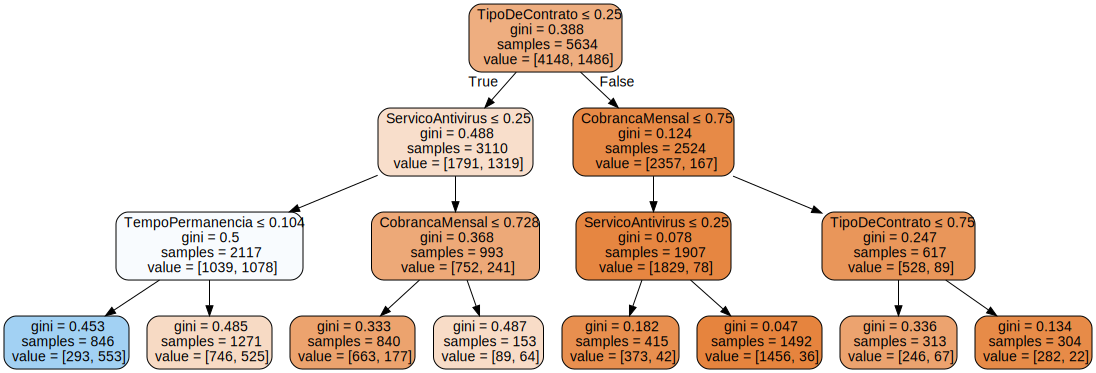

In [ ]:
dot_data = tree.export_graphviz(classificador, out_file=None,
                                feature_names=X_test.columns,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)

display(graph)


#KNN

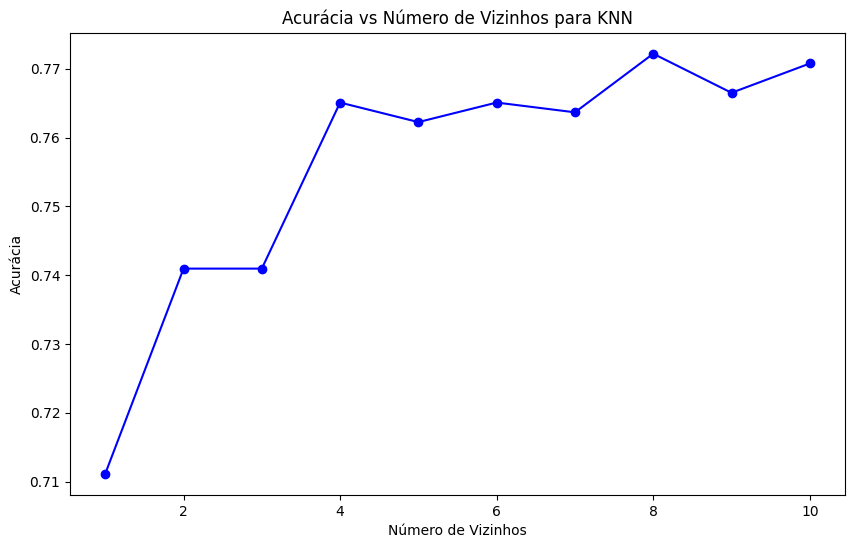

O melhor número de vizinhos é 8 com acurácia de 0.77


In [ ]:
accuracies_knn = []
neighbors_list = range(1, 11)

# Treinar o modelo KNN para cada número de vizinhos e calcular a acurácia
for n_neighbors in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy1 = accuracy_score(y_test, y_pred)
    accuracies_knn.append(accuracy1)

# Encontrar o número de vizinhos com a melhor acurácia
best_n_neighbors = neighbors_list[np.argmax(accuracies_knn)]
best_accuracy = max(accuracies_knn)

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(neighbors_list, accuracies_knn, marker='o', linestyle='-', color='b')
plt.title('Acurácia vs Número de Vizinhos para KNN')
plt.xlabel('Número de Vizinhos')
plt.ylabel('Acurácia')

plt.show()

print(f"O melhor número de vizinhos é {best_n_neighbors} com acurácia de {best_accuracy:.2f}")

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Método para calcular o valor F1-Score
f1score.append(f1_score(y_test, y_pred, average = 'macro'))
# Método para calcular a Precision
precision.append(precision_score(y_test, y_pred, average = 'macro'))
# Método para calcular o Recall
recall.append(recall_score(y_test, y_pred, average = 'macro'))

accuracy.append(accuracy_score(y_test, y_pred))

print("Acurácia: {:.4f}".format(accuracy[1]))
print("Precisão: {:.4f}".format(precision[1]))
print("Recall: {:.4f}".format(recall[1]))
print("F1 Score: {:.4f}".format(f1score[1]))

Acurácia: 0.7708
Precisão: 0.7099
Recall: 0.6642
F1 Score: 0.6781


#Naive Bayes

In [ ]:
classificador = GaussianNB()

classificador.fit(X_train, y_train)
y_pred = classificador.predict(X_test)

# Método para calcular o valor F1-Score
f1score.append(f1_score(y_test, y_pred, average = 'macro'))
# Método para calcular a Precision
precision.append(precision_score(y_test, y_pred, average = 'macro'))
# Método para calcular o Recall
recall.append(recall_score(y_test, y_pred, average = 'macro'))

accuracy.append(accuracy_score(y_test, y_pred))


print("Acurácia: {:.4f}".format(accuracy[2]))
print("Precisão: {:.4f}".format(precision[2]))
print("Recall: {:.4f}".format(recall[2]))
print("F1 Score: {:.4f}".format(f1score[2]))


Acurácia: 0.7594
Precisão: 0.7143
Recall: 0.7522
F1 Score: 0.7238


#RandomForest

In [ ]:
classificador = RandomForestClassifier()
classificador.fit(X_train, y_train)

y_pred = classificador.predict(X_test)

# Método para calcular o valor F1-Score
f1score.append(f1_score(y_test, y_pred, average = 'macro'))
# Método para calcular a Precision
precision.append(precision_score(y_test, y_pred, average = 'macro'))
# Método para calcular o Recall
recall.append(recall_score(y_test, y_pred, average = 'macro'))

accuracy.append(accuracy_score(y_test, y_pred))


print("Acurácia: {:.4f}".format(accuracy[3]))
print("Precisão: {:.4f}".format(precision[3]))
print("Recall: {:.4f}".format(recall[3]))
print("F1 Score: {:.4f}".format(f1score[3]))


Acurácia: 0.8006
Precisão: 0.7529
Recall: 0.7142
F1 Score: 0.7285


#XGBOOST

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# instanciar o modelo XGBoost
model = XGBRegressor()
# chamar o fit para o modelo
model.fit(X_train, y_train)
# fazer previsões em cima do dataset de teste
y_pred = model.predict(X_test)
predictions_binary = [True if p >= 0.5 else False for p in y_pred]
# Método para calcular o valor F1-Score
f1score.append(f1_score(y_test, predictions_binary))
# Método para calcular a Precision
precision.append(precision_score(y_test, predictions_binary))
# Método para calcular o Recall
recall.append(recall_score(y_test,predictions_binary))

accuracy.append(accuracy_score(y_test, predictions_binary))

print("Acurácia: {:.4f}".format(accuracy[4]))
print("Precisão: {:.4f}".format(precision[4]))
print("Recall: {:.4f}".format(recall[4]))
print("F1 Score: {:.4f}".format(f1score[4]))


Acurácia: 0.7885
Precisão: 0.6375
Recall: 0.5144
F1 Score: 0.5694


#Comparação dos algoritmos

In [ ]:
classifiers = ['Decision Trees', 'KNN', 'Naive Bayes', 'Random Forest','XGBOOST']

In [ ]:
# Criar gráfico de linhas e marcadores com Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=classifiers,
    y=accuracy,
    mode='lines+markers',
    name='Acurácia'
))

fig.add_trace(go.Scatter(
    x=classifiers,
    y=f1score,
    mode='lines+markers',
    name='F1-score'
))

fig.add_trace(go.Scatter(
    x=classifiers,
    y=recall,
    mode='lines+markers',
    name='Recall'
))

fig.add_trace(go.Scatter(
    x=classifiers,
    y=precision,
    mode='lines+markers',
    name='Precisão'
))

# Configurações do layout do gráfico
fig.update_layout(
    title='Comparação de Classificadores',
    xaxis_title='Classificadores',
    yaxis_title='Pontuação'
)

# Exibir o gráfico
fig.show()

Podemos verificar que o modelo que obteve o maior recall, medida utilizada para verificar quando realmente seria churn, foi o Naive Bayes, com recall de 75,21%.

#ROCA

#E agora o que fazer?